In [31]:
import yaml
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import os

In [36]:
# Load the YAML file
yaml_file_path = Path("/workspace/data/lchu/hls/jobs/2023-07-28_02-54-57.yaml")  # Replace with the actual path to your YAML file
with open(yaml_file_path, "r") as file:
    yaml_data = yaml.safe_load(file)

# Access the file path from the YAML data
data_file_path = Path(yaml_data["csv_dir"]) / "summary.txt"

# Read the .txt file as a CSV using pandas
df = pd.read_csv(data_file_path, sep=',', header=None)

column_names = ["Epoch","Learning Rate","Training Loss","Training Mask Ratio","Training SSIM","Validation Loss","Training MSE","Validation Mask Ratio","Validation SSIM","Validation MSE"] 
df.columns = column_names


# Display the DataFrame
print(df.head())

   Epoch  Learning Rate  Training Loss  Training Mask Ratio  Training SSIM  \
0      1       0.000041       0.317730             0.733238       0.893119   
1      2       0.000043       0.275874             0.728215       0.900371   
2      3       0.000046       0.270023             0.745304       0.900510   
3      4       0.000050       0.261125             0.739048       0.901536   
4      5       0.000056       0.256523             0.726982       0.904482   

   Validation Loss  Training MSE  Validation Mask Ratio  Validation SSIM  \
0         0.293390      0.001610               0.684229         0.906142   
1         0.275230      0.001401               0.684229         0.908691   
2         0.268440      0.001372               0.684229         0.910537   
3         0.258854      0.001328               0.684229         0.911323   
4         0.257584      0.001303               0.684229         0.912550   

   Validation MSE  
0        0.001490  
1        0.001402  
2        0.001

   Epoch  Learning Rate  Training Loss  Training Mask Ratio  Training SSIM  \
0      1       0.000041       0.317730             0.733238       0.893119   
1      2       0.000043       0.275874             0.728215       0.900371   
2      3       0.000046       0.270023             0.745304       0.900510   
3      4       0.000050       0.261125             0.739048       0.901536   
4      5       0.000056       0.256523             0.726982       0.904482   

   Validation Loss  Training MSE  Validation Mask Ratio  Validation SSIM  \
0         0.293390      0.001610               0.684229         0.906142   
1         0.275230      0.001401               0.684229         0.908691   
2         0.268440      0.001372               0.684229         0.910537   
3         0.258854      0.001328               0.684229         0.911323   
4         0.257584      0.001303               0.684229         0.912550   

   Validation MSE  
0        0.001490  
1        0.001402  
2        0.001

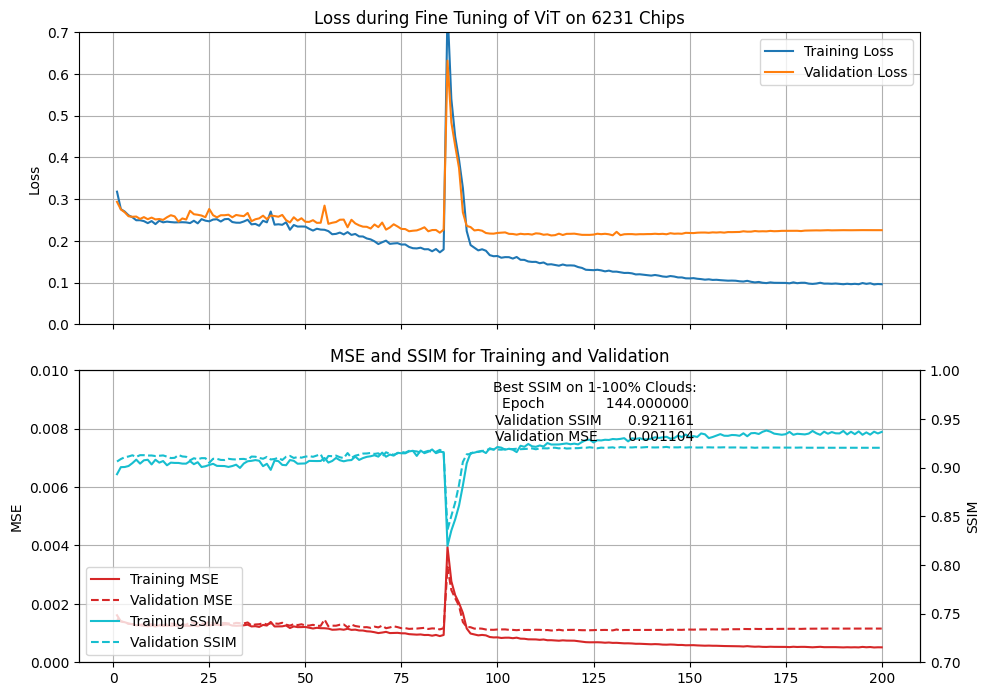

In [47]:
# Load the YAML file
yaml_file_path = Path("/workspace/data/lchu/hls/jobs/2023-07-28_02-54-57.yaml")  # Replace with the actual path to your YAML file
with open(yaml_file_path, "r") as file:
    yaml_data = yaml.safe_load(file)

# Access the file path from the YAML data
data_file_path = Path(yaml_data["csv_dir"]) / "summary.txt"

# Read the .txt file as a CSV using pandas
df = pd.read_csv(data_file_path, sep=',', header=None)

column_names = ["Epoch","Learning Rate","Training Loss","Training Mask Ratio","Training SSIM","Validation Loss","Training MSE","Validation Mask Ratio","Validation SSIM","Validation MSE"] 
df.columns = column_names

# Display the DataFrame
print(df.head())

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plotting D Loss and G Loss for both training and validation
ax1.plot(df["Epoch"], df["Training Loss"], color="tab:blue", label="Training Loss")
ax1.plot(df["Epoch"], df["Validation Loss"], color="tab:orange", label="Validation Loss")

ax1.set_ylabel("Loss")
ax1.set_title("Loss during Fine Tuning of ViT on 6231 Chips")
plt.suptitle("Best SSIM on 1-100% Clouds:\n" + str(df.iloc[df["Validation SSIM"].idxmax(), [0,-2, -1]])[:90], fontsize=10, y=0.4, x = 0.6)
ax1.legend()
ax1.set_ylim(0, 0.7)
ax1.grid(True)

# Plotting MSE and SSIM on separate y-axes
ax2.plot(df["Epoch"], df["Training MSE"], color="tab:red", label="Training MSE")
ax2.plot(df["Epoch"], df["Validation MSE"], color="tab:red", linestyle="--", label="Validation MSE")
ax2.set_ylabel("MSE")
ax2.set_ylim(0, 0.01)

ax2_2 = ax2.twinx()
ax2_2.plot(df["Epoch"], df["Training SSIM"], color="tab:cyan", label="Training SSIM")
ax2_2.plot(df["Epoch"], df["Validation SSIM"], linestyle="--", color="tab:cyan", label="Validation SSIM")
ax2_2.set_ylabel("SSIM")
ax2_2.set_ylim(0.7, 1.0)

# Adding legend for the second y-axis
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_2.get_legend_handles_labels()
ax2_2.legend(lines + lines2, labels + labels2)

ax2.set_title("MSE and SSIM for Training and Validation")
ax2.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
save_dir = Path(yaml_data["visualization_dir"])
os.makedirs(save_dir, exist_ok=True)
filename = 'training_graph.png'
print(str(save_dir / filename))
plt.savefig(save_dir / filename, format='png')